<h2><strong>Support Vector Machine-SVM</strong></h2>

<h3>1.Import Packages And Input Data</h3>

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
iris = datasets.load_iris()
feature = iris["data"]
target = iris["target"]

In [16]:
target_names = iris["target_names"]
labels = target_names[target]

In [42]:
# setosa_PetalLengthCm= feature[labels=="setosa", 2]
# setosa_PetalWidthCm= feature[labels=="setosa", 3]
# versicolor_PetalLengthCm= feature[labels=="versicolor", 2]
# versicolor_PetalWidthCm= feature[labels=="versicolor", 3]
# virginica_PetalLengthCm= feature[labels=="virginica", 2]
# virginica_PetalWidthCm= feature[labels=="virginica", 3]
dict_iris = {
    "SepalLengthCm" : feature[:,0],
    "SepalWidthCm" : feature[:,1],
    "PetalLengthCm" : feature[:,2],
    "PetalWidthCm" : feature[:,3],
    "Labels" : labels
}
df_iris = pd.DataFrame(dict_iris)

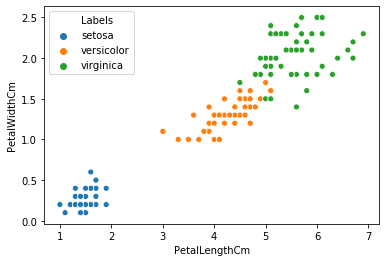

In [149]:
sns.scatterplot(data=df_iris, x="PetalLengthCm", y="PetalWidthCm", hue="Labels")
plt.show()

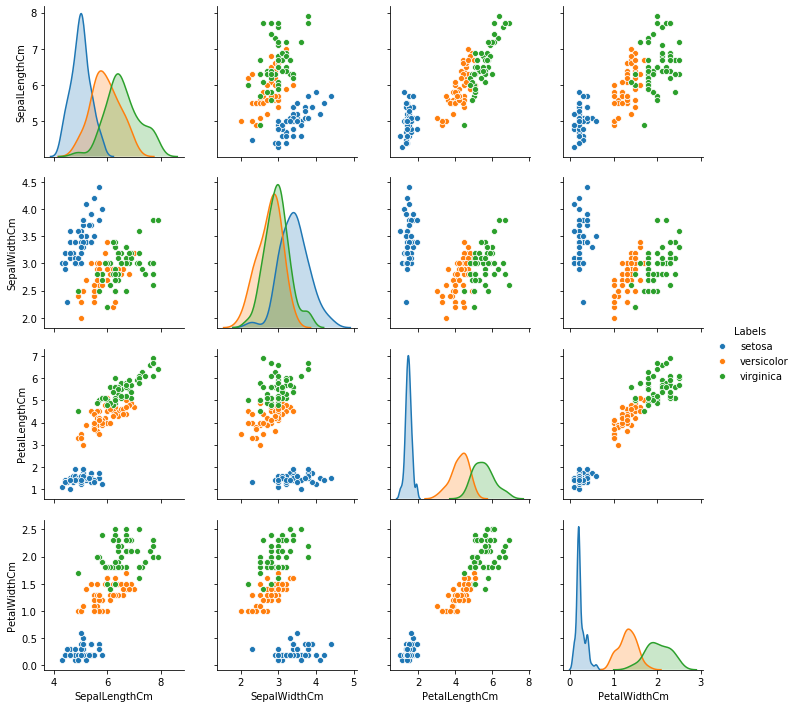

In [150]:
sns.pairplot(data=df_iris, hue="Labels")
plt.show()

<h3>2.Data Preprocessing</h3>

In [44]:
data_X = df_iris.drop("Labels", axis = 1)
data_Y = df_iris["Labels"]

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_Y = le.fit_transform(data_Y)

In [189]:
# train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.2, random_state = 42)

<h3>3.SVM Moddel Classification</h3>

In [255]:
linear_svm = svm.LinearSVC()
linear_svm_fit = linear_svm.fit(data_X.iloc[:,0:2], data_Y)

c:\users\zero1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [256]:
linear_svm_fit

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [195]:
traindata = train_x
traindata["Labels"] = train_y

<ipython-input-195-f97e5239b0f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindata["Labels"] = train_y


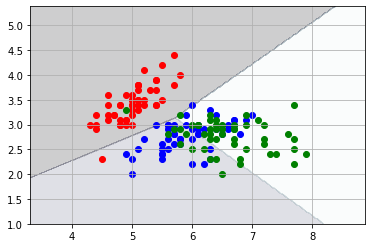

In [269]:
train_x_max=data_X.iloc[:,0].min()-1
train_x_max=data_X.iloc[:,0].max()+1
train_y_min=data_X.iloc[:,1].min()-1
train_y_max=data_X.iloc[:,1].max()+1
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(train_x_min, train_x_max, grid_interval),np.arange(train_y_min, train_y_max,grid_interval))
Z=linear_svm.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(df_iris[df_iris["Labels"]=="setosa"].iloc[:,0], df_iris[df_iris["Labels"]=="setosa"].iloc[:,1], color='red')
plt.scatter(df_iris[df_iris["Labels"]=="versicolor"].iloc[:,0], df_iris[df_iris["Labels"]=="versicolor"].iloc[:,1], color='blue')
plt.scatter(df_iris[df_iris["Labels"]=="virginica"].iloc[:,0], df_iris[df_iris["Labels"]=="versicolor"].iloc[:,1], color='green')
plt.show()

In [203]:
from sklearn import metrics
predict_y = linear_svm.predict(test_x.iloc[:,0:2])
linear_svm_socre = metrics.classification_report(test_y, predict_y)
print(linear_svm_socre)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



<h4><u>SVM Plot Function</u></h4>

In [273]:
def SVM_Plot(svm_clf, title, x, y):
    train_x_max=data_X.iloc[:,x].min()-1
    train_x_max=data_X.iloc[:,x].max()+1
    train_y_min=data_X.iloc[:,y].min()-1
    train_y_max=data_X.iloc[:,y].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(train_x_min, train_x_max, grid_interval),np.arange(train_y_min, train_y_max,grid_interval))
    Z=svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(df_iris[df_iris["Labels"]=="setosa"].iloc[:,x], df_iris[df_iris["Labels"]=="setosa"].iloc[:,y], color='red')
    plt.scatter(df_iris[df_iris["Labels"]=="versicolor"].iloc[:,x], df_iris[df_iris["Labels"]=="versicolor"].iloc[:,y], color='blue')
    plt.scatter(df_iris[df_iris["Labels"]=="virginica"].iloc[:,x], df_iris[df_iris["Labels"]=="versicolor"].iloc[:,y], color='green')
    plt.title(title, fontsize = 16)

<h3>4.Different SVM Kernel</h3>

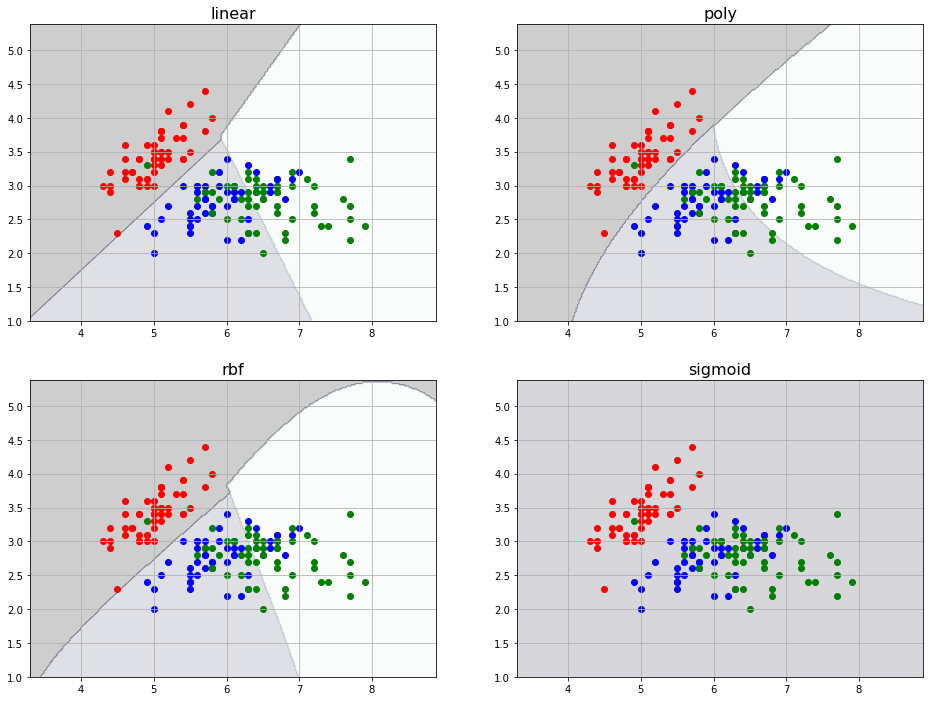

In [274]:
# linear / poly / rbf / sigmoid -0,1
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
plt.figure(figsize=(16,12))
x=0
y=0
for i in kernel_list:
    svm_clf = svm.SVC(kernel=i)
    svm_clf.fit(train_x.iloc[:,0:2], train_y)
    plt.subplot2grid((2,2), (x,y), colspan=1)
    SVM_Plot(svm_clf, i, 0, 1)
    y+=1
    if y!=0 and y%2==0:
        x+=1
        y=0
plt.show()

<h4><u>參數C : 懲罰係數，允許錯誤率越低，但越容易造成Over fit的問題</u></h4>

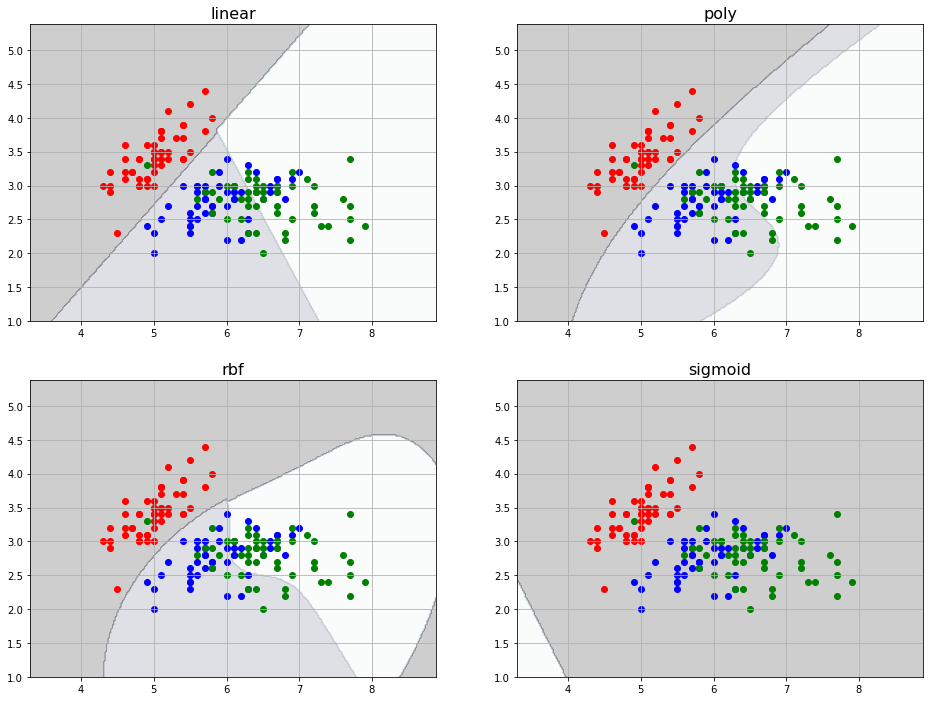

In [280]:
# linear / poly / rbf / sigmoid -0,1 -C=1000
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
plt.figure(figsize=(16,12))
x=0
y=0
for i in kernel_list:
    svm_clf = svm.SVC(kernel=i, C=1000)
    svm_clf.fit(train_x.iloc[:,0:2], train_y)
    plt.subplot2grid((2,2), (x,y), colspan=1)
    SVM_Plot(svm_clf, i, 0, 1)
    y+=1
    if y!=0 and y%2==0:
        x+=1
        y=0
plt.show()

<h4><u>Change Feature</u></h4>

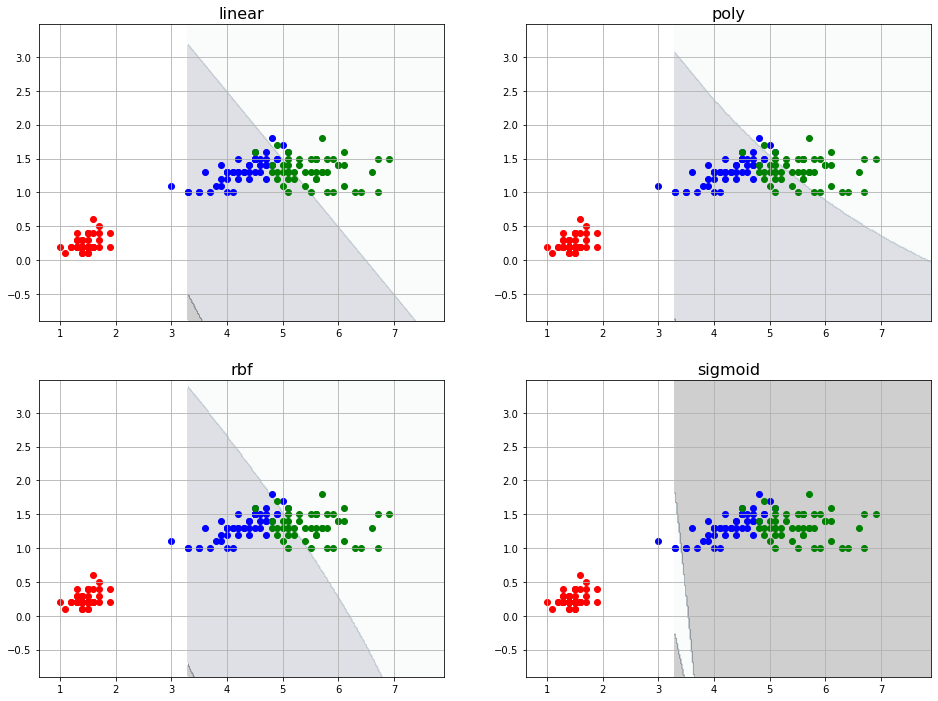

In [284]:
# linear / poly / rbf / sigmoid -2,3
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
plt.figure(figsize=(16,12))
x=0
y=0
for i in kernel_list:
    svm_clf = svm.SVC(kernel=i)
    svm_clf.fit(train_x.iloc[:,2:4], train_y)
    plt.subplot2grid((2,2), (x,y), colspan=1)
    SVM_Plot(svm_clf, i, 2, 3)
    y+=1
    if y!=0 and y%2==0:
        x+=1
        y=0
plt.show()

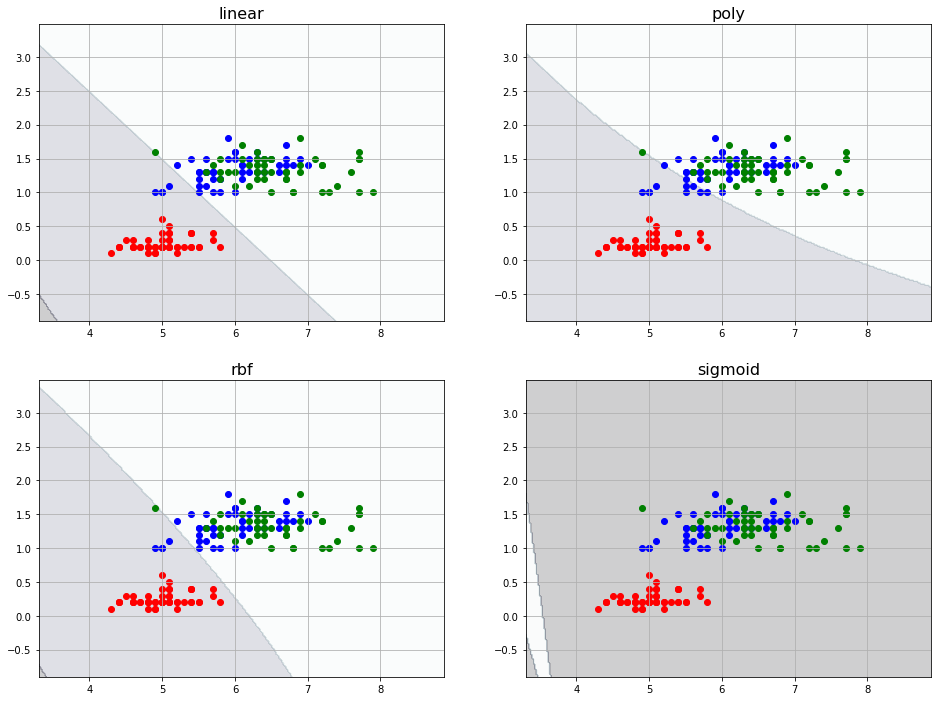

In [283]:
# linear / poly / rbf / sigmoid -0,3
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
plt.figure(figsize=(16,12))
x=0
y=0
for i in kernel_list:
    svm_clf = svm.SVC(kernel=i)
    svm_clf.fit(train_x.iloc[:,2:4], train_y)
    plt.subplot2grid((2,2), (x,y), colspan=1)
    SVM_Plot(svm_clf, i, 0, 3)
    y+=1
    if y!=0 and y%2==0:
        x+=1
        y=0
plt.show()

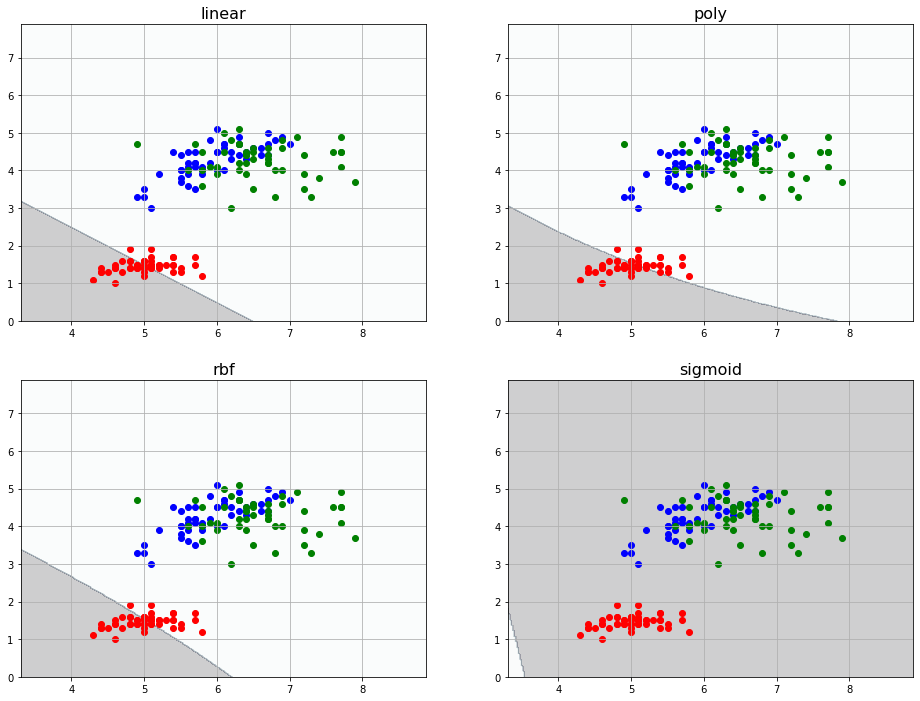

In [278]:
# linear / poly / rbf / sigmoid -0,2
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
plt.figure(figsize=(16,12))
x=0
y=0
for i in kernel_list:
    svm_clf = svm.SVC(kernel=i)
    svm_clf.fit(train_x.iloc[:,2:4], train_y)
    plt.subplot2grid((2,2), (x,y), colspan=1)
    SVM_Plot(svm_clf, i, 0, 2)
    y+=1
    if y!=0 and y%2==0:
        x+=1
        y=0
plt.show()